# 🚂 World Metro

## World Metro Progress, Сongestion, Lines Length and etc

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv("metro_countries_cities.csv")

## Basic Checks

In [3]:
# First five rows
data.head()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30,africa
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,latin_america
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,asia
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90,australia
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80,europe


In [4]:
# Last five rows
data.tail()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
193,San Juan,United States,Tren Urbano,2004,2005,16,172,1.1,north_america
194,"Washington, D.C.",United States,Washington Metro,1976,2014,91,188,68.1,north_america
195,Tashkent,Uzbekistan,Tashkent Metro,1977,2020,39,571,38.8,asia
196,Caracas,Venezuela,Caracas Metro,1983,2015,52,672,358.0,latin_america
197,Hanoi,Vietnam,Hanoi Metro,2021,2021,12,131,0.0,asia


In [5]:
# Shape of data
data.shape

(198, 9)

* Dataset contains 9 features with 198 observations.

In [6]:
# Shape of columns
data.columns

Index(['city', 'country', 'name', 'year', 'year_last_expansion', 'stations',
       'length_km', 'annual_ridership_mill', 'region'],
      dtype='object')

In [7]:
# Inforamtion of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   198 non-null    object 
 1   country                198 non-null    object 
 2   name                   198 non-null    object 
 3   year                   198 non-null    int64  
 4   year_last_expansion    198 non-null    int64  
 5   stations               198 non-null    int64  
 6   length_km              198 non-null    int64  
 7   annual_ridership_mill  198 non-null    float64
 8   region                 198 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 14.0+ KB


In [8]:
# Statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,198.0,1987.858586,31.617161,1890.0,1976.000,1995.50,2012.750,2022.00
year_last_expansion,198.0,2014.565657,13.167921,1896.0,2014.000,2019.00,2021.000,2022.00
stations,198.0,68.939394,76.200753,6.0,21.000,41.00,90.750,424.00
length_km,198.0,1506.595960,4900.037419,12.0,175.000,392.00,1001.250,49039.00
annual_ridership_mill,198.0,263.254980,482.654133,0.0,24.025,92.95,247.925,2834.69


In [9]:
# Statistics of data for categorical data
data.describe(include='O')

,city,country,name,region
count,198,198,198,198
unique,187,59,198,6
top,Seoul,China,Algiers Metro,asia
freq,3,43,1,117


In [10]:
# Check duplicate values in data
data.duplicated().sum()

0

## Visulization

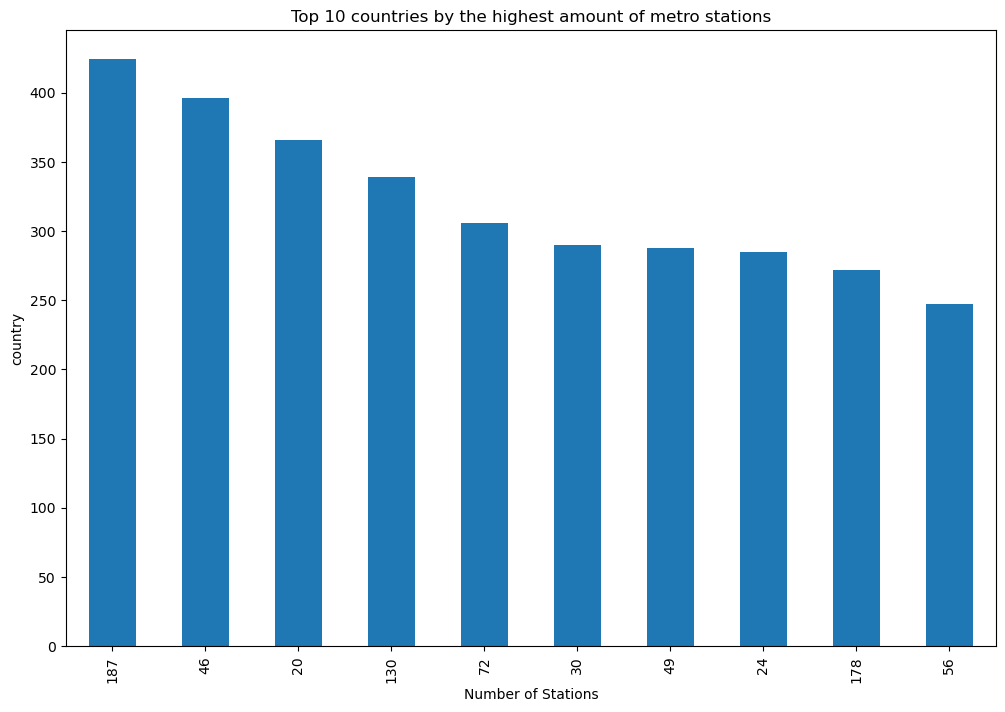

In [11]:
# Number of Stations Vs country
data['stations'].sort_values(ascending=False).head(10).plot(figsize=(12,8),kind='bar')
plt.xlabel('Number of Stations')
plt.ylabel('country')
plt.title('Top 10 countries by the highest amount of metro stations')
plt.show()

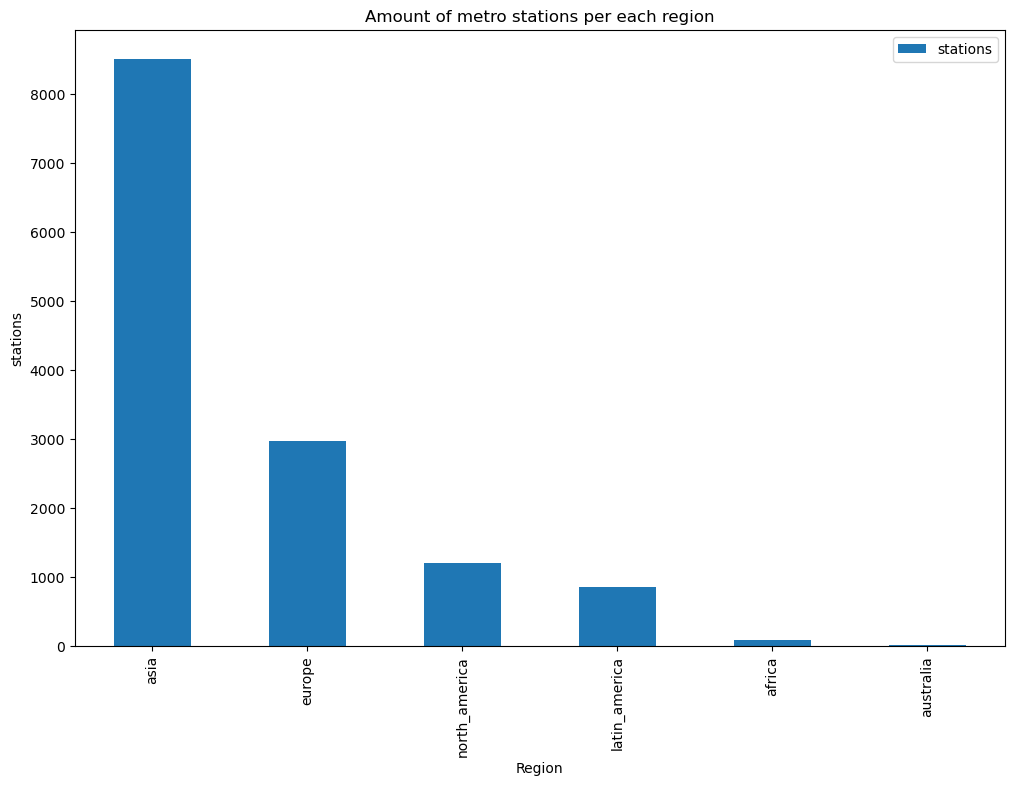

In [12]:
# Region Vs stations
data[['region','stations']].groupby('region').sum().sort_values('stations',ascending = False).plot(kind = 'bar',
                                                                                    figsize=(12,8))
plt.title('Amount of metro stations per each region')
plt.xlabel('Region')
plt.ylabel('stations')
plt.show()

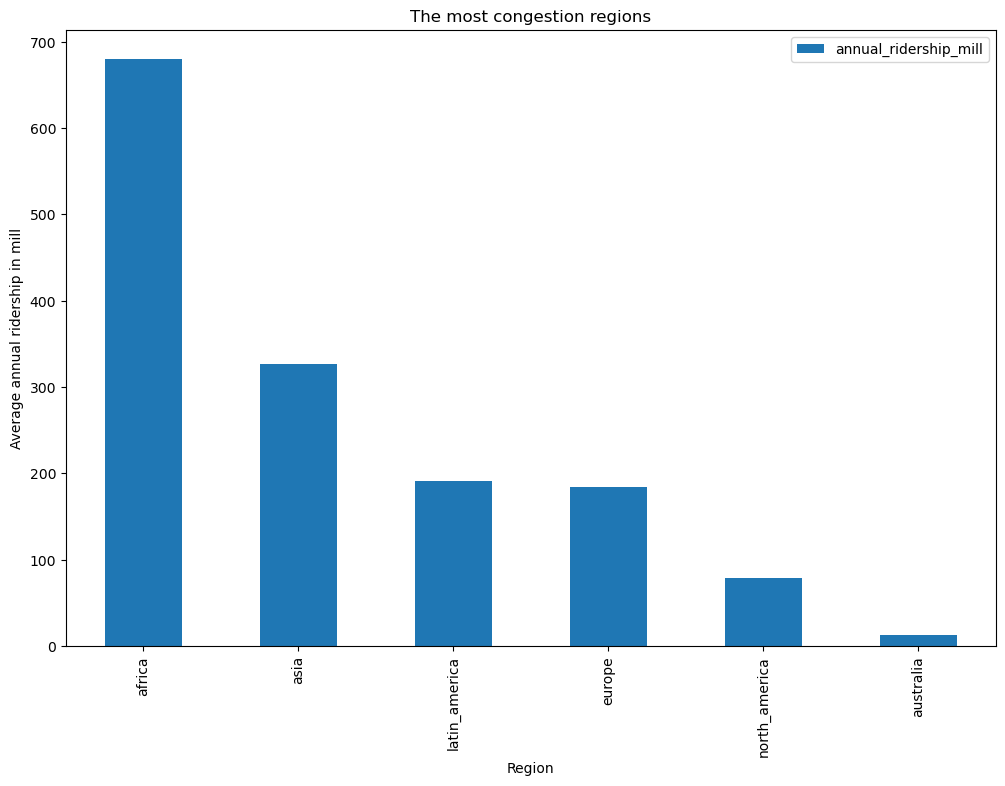

In [13]:
# Region Vs Average annual ridership in mill
data[['region','annual_ridership_mill']].groupby('region').mean().sort_values('annual_ridership_mill',ascending = False).plot(kind = 'bar',figsize = (12,8))
plt.title('The most congestion regions')
plt.xlabel('Region')
plt.ylabel('Average annual ridership in mill')
plt.show()

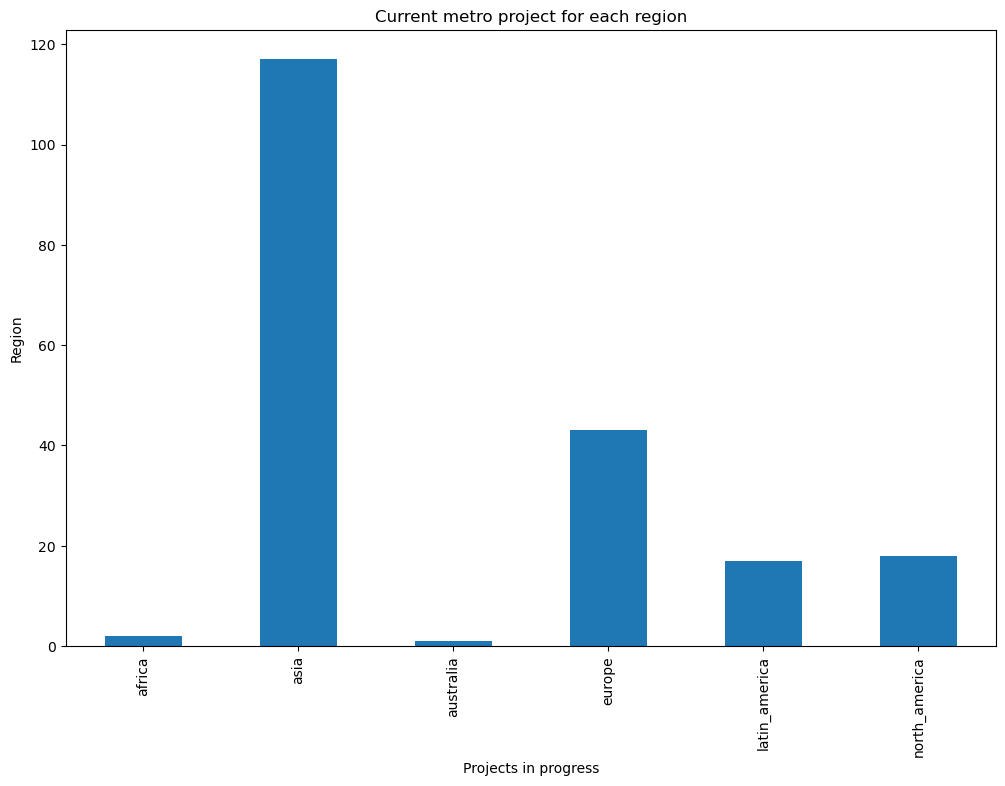

In [14]:
# Projects in progress & Region
data.groupby('region').count()['city'].plot(kind = 'bar', figsize = (12,8))
plt.ylabel('Region')
plt.xlabel('Projects in progress')
plt.title('Current metro project for each region')
plt.show()